In \[1\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

In \[2\]:

    import sklearn.svm as svm
    housing_data = pd.read_csv('Housing.csv')
    housing_data.head()

Out\[2\]:

|     | price    | area | bedrooms | bathrooms | stories | mainroad | guestroom | basement | hotwaterheating | airconditioning | parking | prefarea | furnishingstatus |
|-----|----------|------|----------|-----------|---------|----------|-----------|----------|-----------------|-----------------|---------|----------|------------------|
| 0   | 13300000 | 7420 | 4        | 2         | 3       | yes      | no        | no       | no              | yes             | 2       | yes      | furnished        |
| 1   | 12250000 | 8960 | 4        | 4         | 4       | yes      | no        | no       | no              | yes             | 3       | no       | furnished        |
| 2   | 12250000 | 9960 | 3        | 2         | 2       | yes      | no        | yes      | no              | no              | 2       | yes      | semi-furnished   |
| 3   | 12215000 | 7500 | 4        | 2         | 2       | yes      | no        | yes      | no              | yes             | 3       | yes      | furnished        |
| 4   | 11410000 | 7420 | 4        | 1         | 2       | yes      | yes       | yes      | no              | yes             | 2       | no       | furnished        |

In \[3\]:

    from sklearn.preprocessing import LabelEncoder

    label_encoder = LabelEncoder()
    categorical_columns = [ 'basement', 'hotwaterheating', 'guestroom','mainroad', 'airconditioning', 'furnishingstatus' ,'prefarea']  

    for column in categorical_columns:
        housing_data[column] = label_encoder.fit_transform(housing_data[column])


    housing_data.head(100)

Out\[3\]:

|     | price    | area | bedrooms | bathrooms | stories | mainroad | guestroom | basement | hotwaterheating | airconditioning | parking | prefarea | furnishingstatus |
|-----|----------|------|----------|-----------|---------|----------|-----------|----------|-----------------|-----------------|---------|----------|------------------|
| 0   | 13300000 | 7420 | 4        | 2         | 3       | 1        | 0         | 0        | 0               | 1               | 2       | 1        | 0                |
| 1   | 12250000 | 8960 | 4        | 4         | 4       | 1        | 0         | 0        | 0               | 1               | 3       | 0        | 0                |
| 2   | 12250000 | 9960 | 3        | 2         | 2       | 1        | 0         | 1        | 0               | 0               | 2       | 1        | 1                |
| 3   | 12215000 | 7500 | 4        | 2         | 2       | 1        | 0         | 1        | 0               | 1               | 3       | 1        | 0                |
| 4   | 11410000 | 7420 | 4        | 1         | 2       | 1        | 1         | 1        | 0               | 1               | 2       | 0        | 0                |
| ... | ...      | ...  | ...      | ...       | ...     | ...      | ...       | ...      | ...             | ...             | ...     | ...      | ...              |
| 95  | 6300000  | 4100 | 3        | 2         | 3       | 1        | 0         | 0        | 0               | 1               | 2       | 0        | 1                |
| 96  | 6300000  | 9000 | 3        | 1         | 1       | 1        | 0         | 1        | 0               | 0               | 1       | 1        | 0                |
| 97  | 6300000  | 6400 | 3        | 1         | 1       | 1        | 1         | 1        | 0               | 1               | 1       | 1        | 1                |
| 98  | 6293000  | 6600 | 3        | 2         | 3       | 1        | 0         | 0        | 0               | 1               | 0       | 1        | 2                |
| 99  | 6265000  | 6000 | 4        | 1         | 3       | 1        | 1         | 1        | 0               | 0               | 0       | 1        | 2                |

100 rows × 13 columns

In \[4\]:

    plt.figure(1)
    sns.heatmap(housing_data.corr())
    plt.title('Housing Dataset Correlation')

Out\[4\]:

    Text(0.5, 1.0, 'Housing Dataset Correlation')

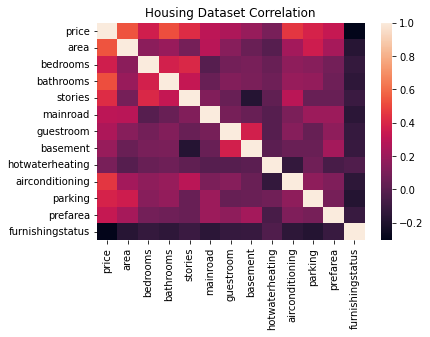

In \[5\]:

    from sklearn.model_selection import train_test_split

    X = housing_data.drop(columns=['airconditioning'])
    Y = housing_data['airconditioning']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In \[6\]:

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report


    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, Y_train)


    y_pred = classifier.predict(X_test)

    print(classification_report(Y_test, y_pred))
    print(confusion_matrix(Y_test, y_pred))

    from sklearn.metrics import accuracy_score
    print('accuracy:', accuracy_score(Y_test, y_pred))

                  precision    recall  f1-score   support

               0       0.79      0.66      0.72        99
               1       0.38      0.55      0.45        38

        accuracy                           0.63       137
       macro avg       0.59      0.60      0.58       137
    weighted avg       0.68      0.63      0.64       137

    [[65 34]
     [17 21]]
    accuracy: 0.6277372262773723

In \[7\]:

    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    y_pred_prob = classifier.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

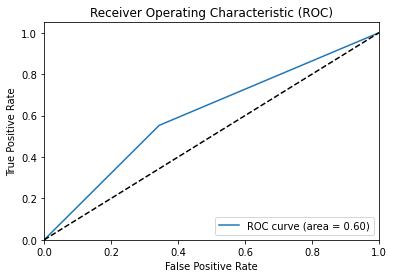

In \[ \]: